In [1]:
import os
import pandas as pd
import supereeg as se
import numpy as np
import nibabel as nib
from nilearn import plotting as ni_plt
from nilearn.image import resample_img
from nilearn import datasets, image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fig_dir = '../../paper/figs/source/networks'

In [3]:
nii_bo_dir = '../../data/niis'
networks_nii_bo_dir = os.path.join(nii_bo_dir, 'networks')
if not os.path.exists(networks_nii_bo_dir):
    os.makedirs(networks_nii_bo_dir)
    
freq_nii_bo_dir = os.path.join(nii_bo_dir, 'freq')

In [50]:
yeo_colors = pd.read_fwf(os.path.join(fig_dir, 'Yeo2011_17Networks_ColorLUT.txt'))
yeo_colors.columns = ["inds", "networks", "x", "y", "z", "labels"]


In [51]:
yeo_color_labels = ['visual peripheral', 'visual central', 'somatomotor A', 'somatomotor B', 'dorsal attention A', 
                    'dorsal attention B', 'ventral attention', 'salience', 'limbic A', 'limbic B', 'control C', 
                    'control A', 'control B', 'default D (auditory)', 'default C', 'default A', 'default B']
yeo_colors['labels'] = yeo_color_labels

In [52]:
yeo_colors

,inds,networks,x,y,z,labels
0,1,17Networks_1,120,18,134,visual peripheral
1,2,17Networks_2,255,0,0,visual central
2,3,17Networks_3,70,130,180,somatomotor A
3,4,17Networks_4,42,204,164,somatomotor B
4,5,17Networks_5,74,155,60,dorsal attention A
5,6,17Networks_6,0,118,14,dorsal attention B
6,7,17Networks_7,196,58,250,ventral attention
7,8,17Networks_8,255,152,213,salience
8,9,17Networks_9,220,248,164,limbic A
9,10,17Networks_10,122,135,50,limbic B


In [5]:
yeo_file = os.path.join(fig_dir, 'Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz')
yeo = se.load(yeo_file)

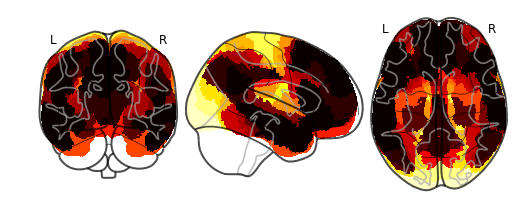

In [6]:
yeo.plot_glass_brain()

In [7]:
downsampled = 4
downsampled_nii = se.Nifti(resample_img(yeo, target_affine=np.eye(3)*downsampled, interpolation='nearest'))

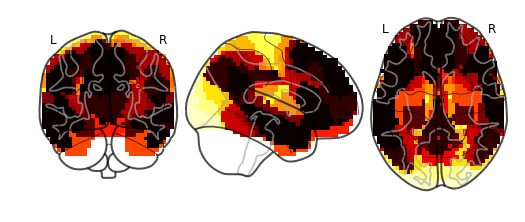

In [8]:
downsampled_nii.plot_glass_brain()

In [9]:
yeo_bo = se.Brain(downsampled_nii)

In [10]:
yeo_bo.save(os.path.join(networks_nii_bo_dir, 'yeo_bo.bo'))

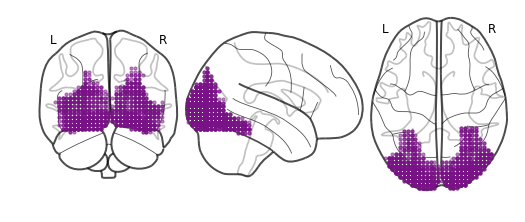

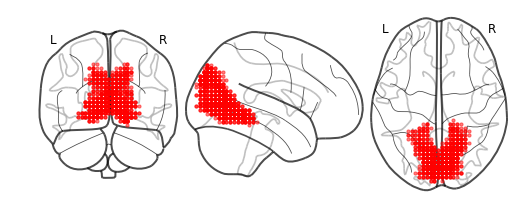

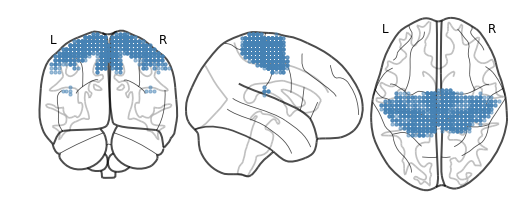

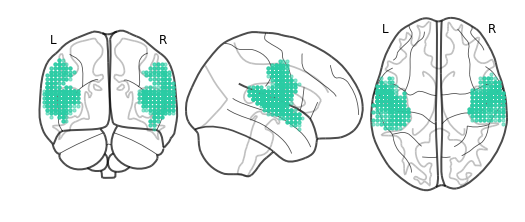

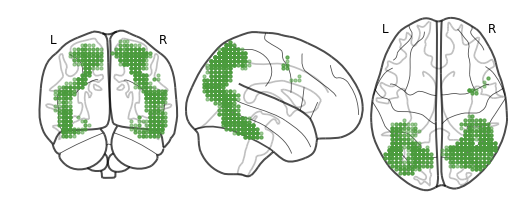

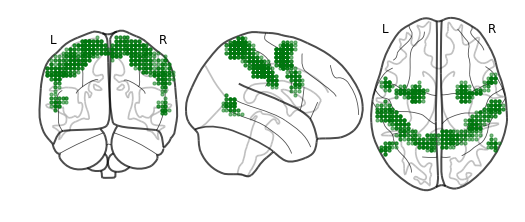

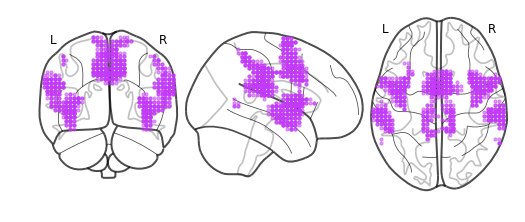

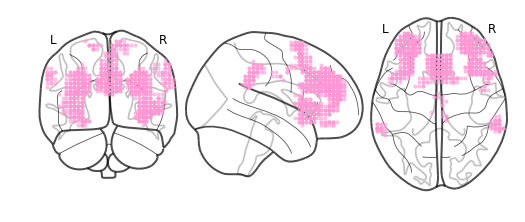

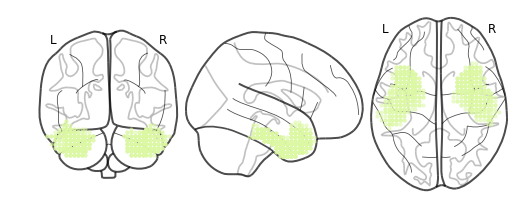

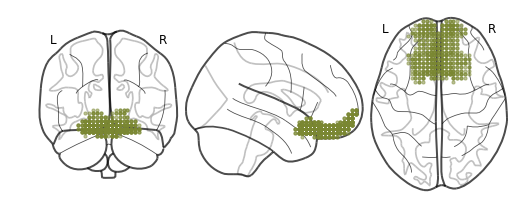

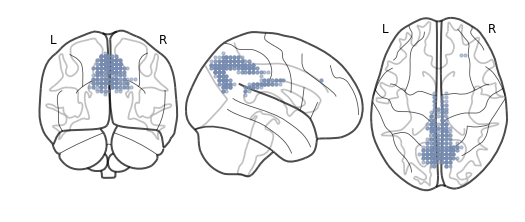

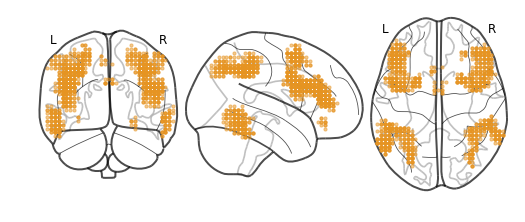

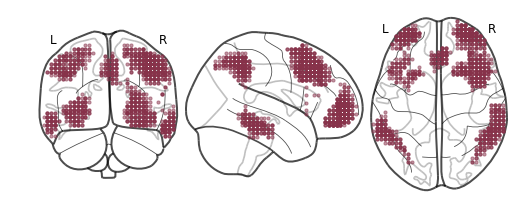

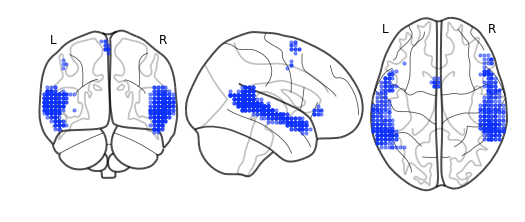

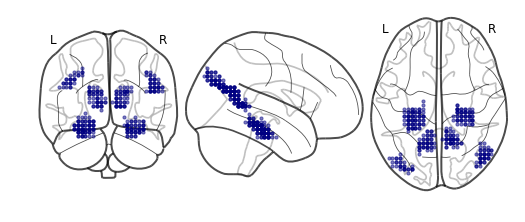

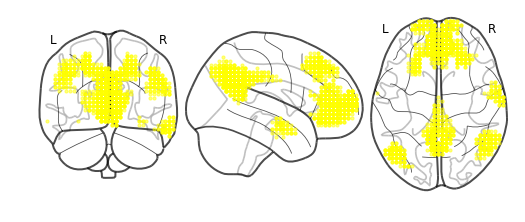

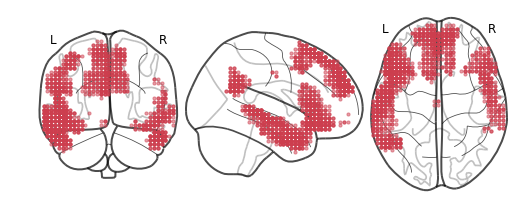

In [11]:
for n in np.arange(1, 18):
    mask_n = yeo_bo.get_data()==n
    masked_locs = yeo_bo.get_locs().as_matrix()[mask_n.as_matrix().ravel()]
    bo_n = se.Brain(data=np.atleast_2d(np.ones(masked_locs.shape[0])), locs=masked_locs)
    locs = bo_n.get_locs()
    colors = yeo_colors[yeo_colors.inds==n][['x', 'y', 'z']].values
    ni_plt.plot_connectome(np.eye(locs.shape[0]), locs, output_file=None,
                                   node_kwargs={'alpha': 0.5, 'edgecolors': None},
                                   node_size=10, node_color=colors/255)
    outfile = os.path.join(networks_nii_bo_dir, 'bo_network_' + str(n))
    bo_n.save(outfile)

In [12]:
yeo_nii = se.load(os.path.join(networks_nii_bo_dir, 'yeo_bo.bo'), return_type='nii')

In [13]:
f = 'alpha'
freq_file = os.path.join(freq_nii_bo_dir, f + '_best.bo')
freq_nii = se.load(freq_file, return_type='nii')
mask = freq_nii.get_data() > 0
counts = np.array(np.unique(yeo_nii.get_data()[mask], return_counts=True))

In [14]:
nets = counts[0][counts[0]>0]
counts = counts[1][counts[0]>0]

In [61]:
pie_colors = np.array([])
color_labels = []
for c in nets:
    if pie_colors.shape[0]==0:
        pie_colors = yeo_colors[yeo_colors.inds==c][['x', 'y', 'z']].values
        color_labels.append(yeo_colors[yeo_colors.inds==c]['labels'].values[0])
    else:
        pie_colors = np.vstack((pie_colors, yeo_colors[yeo_colors.inds==c][['x', 'y', 'z']].values))
        color_labels.append(yeo_colors[yeo_colors.inds==c]['labels'].values[0])

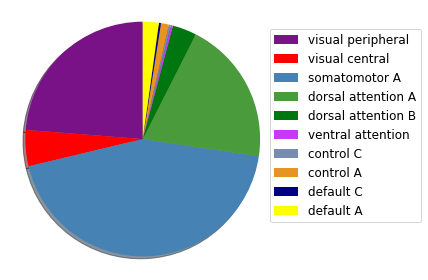

In [87]:

patches, texts = plt.pie(counts/counts.sum(), colors=sns.color_palette(pie_colors/255), shadow=True, startangle=90)
plt.legend(patches, color_labels, loc='upper left', bbox_to_anchor=(0.95, .45, 0.5, 0.5), fontsize = 'large')
plt.axis('equal')
plt.tight_layout()
plt.show()

delta


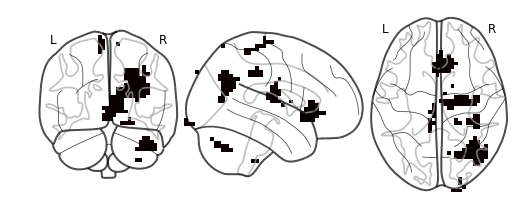

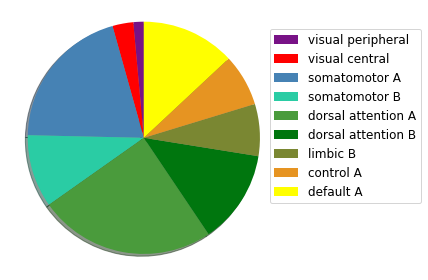

theta


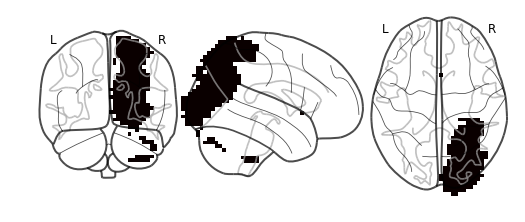

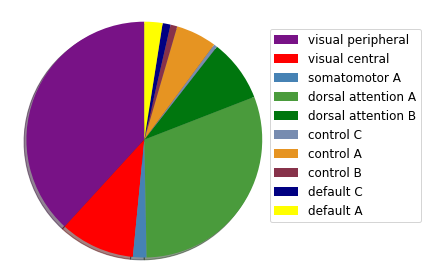

alpha


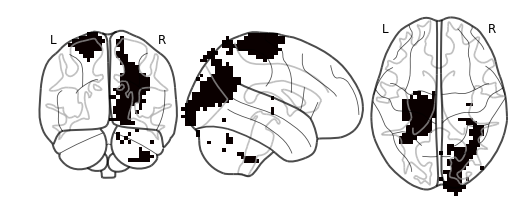

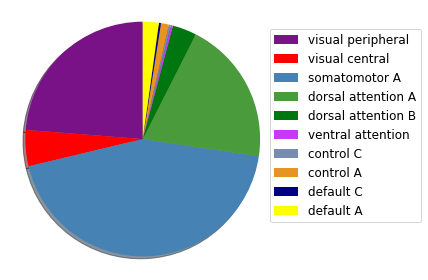

beta


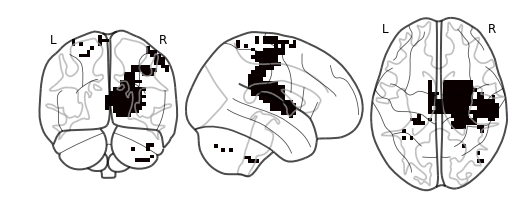

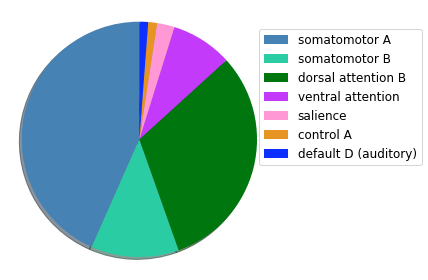

lgamma


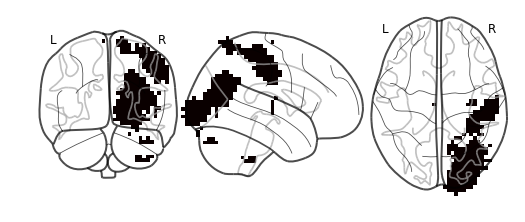

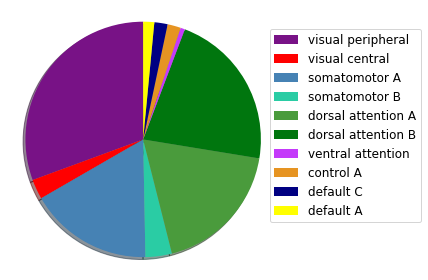

hgamma


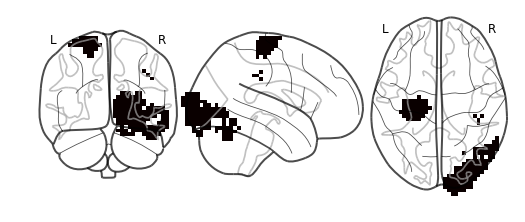

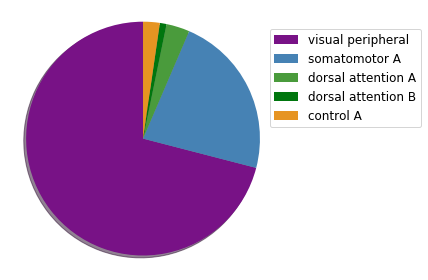

broadband


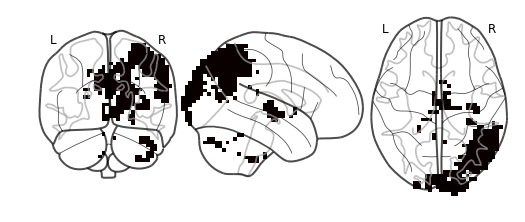

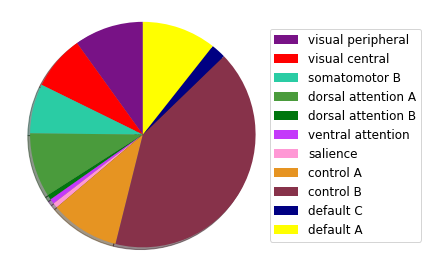

In [89]:
freqs = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
for f in freqs:
    
    print(f)
    freq_file = os.path.join(freq_nii_bo_dir, f + '_best.bo')
    freq_nii = se.load(freq_file, return_type='nii')
    freq_nii.plot_glass_brain()
    mask = freq_nii.get_data() > 0
    counts = np.array(np.unique(yeo_nii.get_data()[mask], return_counts=True))
    
    nets = counts[0][counts[0]>0]
    counts = counts[1][counts[0]>0]
    
    pie_colors = np.array([])
    color_labels = []
    for c in nets:
        if pie_colors.shape[0]==0:
            pie_colors = yeo_colors[yeo_colors.inds==c][['x', 'y', 'z']].values
            color_labels.append(yeo_colors[yeo_colors.inds==c]['labels'].values[0])
        else:
            pie_colors = np.vstack((pie_colors, yeo_colors[yeo_colors.inds==c][['x', 'y', 'z']].values))
            color_labels.append(yeo_colors[yeo_colors.inds==c]['labels'].values[0])
            

    patches, texts = plt.pie(counts/counts.sum(), colors=sns.color_palette(pie_colors/255), shadow=True, startangle=90)
    plt.legend(patches, color_labels, loc='upper left', bbox_to_anchor=(0.95, .45, 0.5, 0.5), fontsize = 'large')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()   